In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

from clim_utils import label_latlons

def label_latlons(ax,lons,lats):
    
    # Longitude labels
    ax.set_xticks(lons, crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    ax.set_yticks(lats, crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

### ESPI Index

Average precipitation anomalies in North America down to Equator

ESPI Positive: ESPI >= 1.0 | Correlates to El Nino with some lead/lag
ESPI Negative: ESPI <= -1.0 | Correlates to La Nina with some lead/lag
Neutral: In Between

In [2]:
file_espi='/scratch/jcampb8/espi_1979-2019.nc'
ds_espi=xr.open_dataset(file_espi)
ds_espi=ds_espi.sel(time=slice('1979-01-01','2018-12-01'))
ds_espi

<xarray.Dataset>
Dimensions:  (time: 480)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    espi     (time) float64 ...

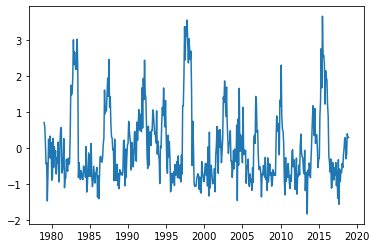

In [3]:
plt.plot(ds_espi['time'],ds_espi['espi'])

## Define ESPI Positive, Negative, and Neutral
Use `xarray.where`

In [4]:
espi_pos=ds_espi['espi'].where(ds_espi['espi']>=1)
espi_neg=ds_espi['espi'].where(ds_espi['espi']<=-1)
espi_neutral=ds_espi['espi'].where(np.logical_and(ds_espi['espi'] < 1,ds_espi['espi'] > -1))

In [5]:
print('ESPI Positive: ',espi_pos.count(dim='time').values)

ESPI Positive:  74


In [6]:
print('ESPI Negative: ',espi_neg.count(dim='time').values)

ESPI Negative:  42


In [7]:
print('ESPI Neutral: ',espi_neutral.count(dim='time').values)

ESPI Neutral:  364


In [8]:
counts=[espi_pos.count(dim='time').values,
       espi_neg.count(dim='time').values,
       espi_neutral.count(dim='time').values]
counts

[array(74), array(42), array(364)]

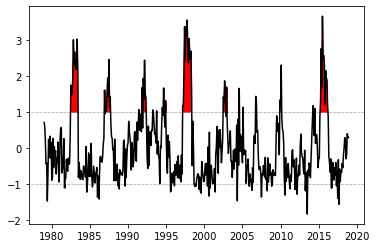

In [9]:
plt.plot(ds_espi['time'],ds_espi['espi'],'k') #k refers black,, b refers to blue, r refers to red
plt.fill_between(ds_espi['time'],1,espi_pos,color='r')
plt.fill_between(ds_espi['time'],-1,espi_neg,color='b')
plt.axhline(1,color='k',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='k',linewidth=0.5,linestyle='dotted')

### Precipitation Data

CMAP Monthly Precipitation `/scratch/jcampb8/enso2_1979-2018.cmap.monthly.precip.mon.mean.nc`

In [10]:
file='/scratch/jcampb8/enso4_1979-2018.cmap.monthly.precip.mon.mean.nc'
ds_precip=xr.open_dataset(file)
ds_precip=ds_precip.sel(time=slice('1979-01-01','2018-12-01'))
ds_precip

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, time: 480)
Coordinates:
  * lat      (lat) float32 68.75 66.25 63.75 61.25 ... -1.25 -3.75 -6.25 -8.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    version:        V1912
    history:        update 12/2019 V1912
    data_modified:  2019-12-12

### Make anomalies of our precipitation data

`groupby`

In [11]:
ds_climo=ds_precip.groupby('time.month').mean()
ds_anoms=ds_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, time: 480)
Coordinates:
  * lat      (lat) float32 68.75 66.25 63.75 61.25 ... -1.25 -3.75 -6.25 -8.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (time, lat, lon) float32 -0.20839843 -0.12617189 ... 0.44726562

In [12]:
espi_pos

<xarray.DataArray 'espi' (time: 480)>
array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan, 1.746, 1.475, 1.534,
       1.94 , 3.01 , 2.324, 2.671, 2.299, 2.18 , 2.333, 3.028, 2.082,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan, 1.612,   nan, 1.067, 1.032,
       1.511, 1.943, 1.443, 2.461, 1.129, 1.426,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan, 1.066,   nan,   nan,   nan,
         nan, 1.676,   nan, 1.935, 1.344, 2.442, 1.508, 1.416,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
       1.059,   nan,   nan,   nan,   nan,   nan, 1.032,   nan,   nan,
...
         nan, 1.66 ,   nan,   nan,   nan,   nan,   nan, 1.134,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
       1.435, 1.279,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan, 1.331, 1.155, 2.305,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
       1.176,   nan,   nan, 1.1  ,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan, 1.305, 2.765, 1.672, 3.667, 2.539, 2.575,
       2.341, 1.221, 2.154, 1.956, 1.891, 1.22 ,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01

In [13]:
espi_pos_precip=ds_anoms.sel(time=espi_pos.dropna(dim='time')['time']).mean(dim='time')
espi_neg_precip=ds_anoms.sel(time=espi_neg.dropna(dim='time')['time']).mean(dim='time')
espi_neutral_precip=ds_anoms.sel(time=espi_neutral.dropna(dim='time')['time']).mean(dim='time')

In [14]:
comp_precip=[espi_pos_precip, espi_neg_precip, espi_neutral_precip]
comp_precip

[<xarray.Dataset>
 Dimensions:  (lat: 32, lon: 36)
 Coordinates:
   * lat      (lat) float32 68.75 66.25 63.75 61.25 ... -1.25 -3.75 -6.25 -8.75
   * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
 Data variables:
     precip   (lat, lon) float32 -0.008683492 0.0462389 ... -0.21878701,
 <xarray.Dataset>
 Dimensions:  (lat: 32, lon: 36)
 Coordinates:
   * lat      (lat) float32 68.75 66.25 63.75 61.25 ... -1.25 -3.75 -6.25 -8.75
   * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
 Data variables:
     precip   (lat, lon) float32 0.08016185 0.06868024 ... 0.24322923 0.11905219,
 <xarray.Dataset>
 Dimensions:  (lat: 32, lon: 36)
 Coordinates:
   * lat      (lat) float32 68.75 66.25 63.75 61.25 ... -1.25 -3.75 -6.25 -8.75
   * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
 Data variables:
     precip   (lat, lon) float32 -0.007484133 -0.017324861 ... 0.030741712]

### 3-panel map of ESPI correlated El Nino, La Nina, and Neutral Precipitation Composite

Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO')

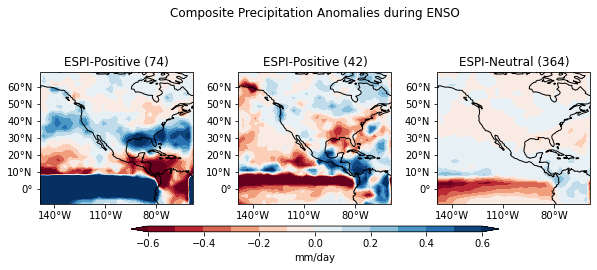

In [15]:
labels=['ESPI-Positive','ESPI-Positive', 'ESPI-Neutral']
clevs=np.arange(-0.6,0.7,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,4))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]['precip']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='RdBu',extend='both')
        
        label_latlons(axs[i],np.arange(-140,-60,30),
                     np.arange(0,70,10))
        
       # Longitude labels
       # axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
       # lon_formatter = cticker.LongitudeFormatter()
       # axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        # axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        # lat_formatter = cticker.LatitudeFormatter()
        # axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.3)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO')

### High Composite (EQ, 140W)

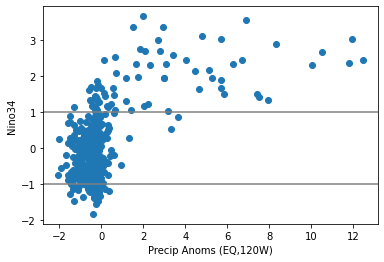

In [16]:
pt=ds_anoms.sel(lat=0,lon=360-140,method='nearest')
plt.scatter(pt['precip'],ds_espi['espi'])
plt.xlabel('Precip Anoms (EQ,120W)')
plt.ylabel('Nino34')

plt.axhline(1,color='gray')
plt.axhline(-1,color='gray')

### Medium Composite (10N,80W)

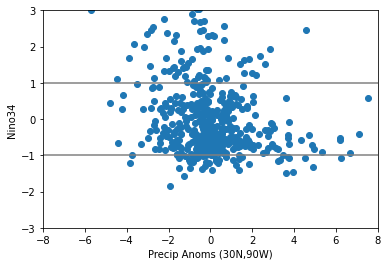

In [17]:
pt=ds_anoms.sel(lat=10,lon=360-80,method='nearest')
plt.scatter(pt['precip'],ds_espi['espi'])
plt.xlim([-8,8])
plt.ylim([-3,3])
plt.xlabel('Precip Anoms (30N,90W)')
plt.ylabel('Nino34')

plt.axhline(1,color='gray')
plt.axhline(-1,color='gray')

### Low Composite (40N,130W)

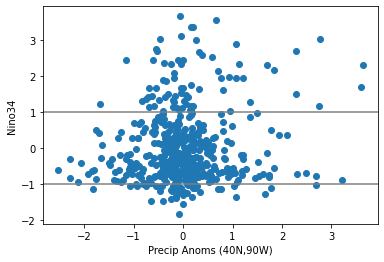

In [18]:
pt=ds_anoms.sel(lat=40,lon=360-130,method='nearest')
plt.scatter(pt['precip'],ds_espi['espi'])
plt.xlabel('Precip Anoms (40N,90W)')
plt.ylabel('Nino34')

plt.axhline(1,color='gray')
plt.axhline(-1,color='gray')